In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [17]:
%matplotlib inline

In [21]:
data = pd.read_csv("C:\\Users\\lahai\\Downloads\\Housing_Price_Data.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
data.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [25]:
#Select variables
variables = ['price','area','bedrooms','bathrooms','stories']

In [27]:
data_subset = data[variables]

In [29]:
description = data_subset.describe(include='all')
print(description)

              price          area    bedrooms   bathrooms     stories
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000


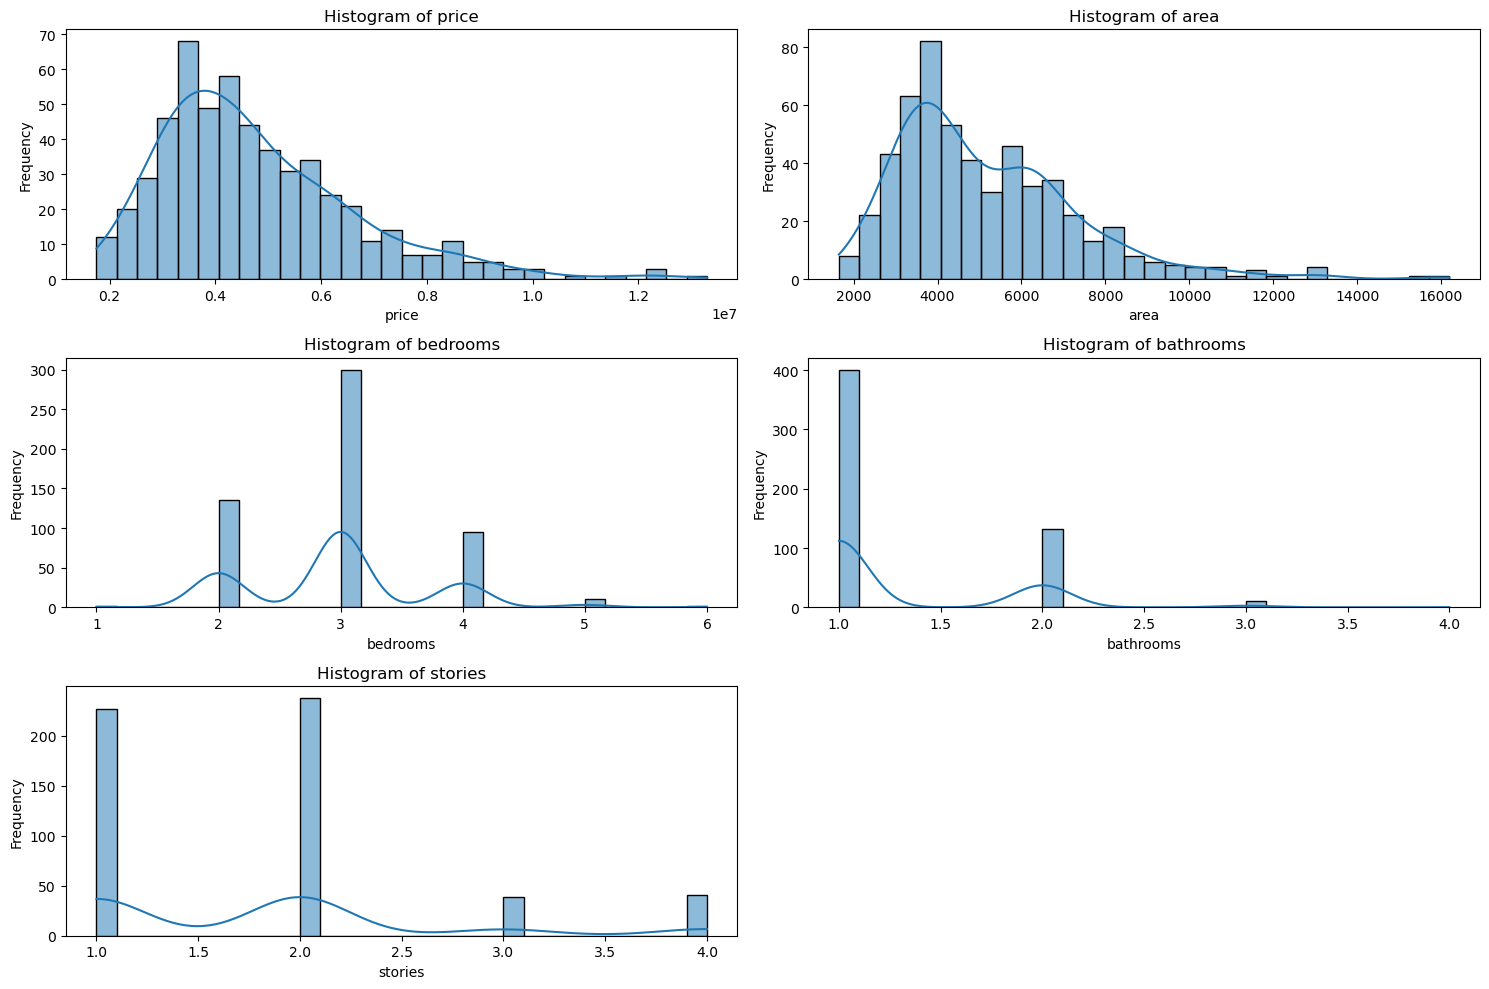

In [34]:
#Histogram
plt.figure(figsize=(15, 10))
for i, column in enumerate(variables):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[column],
bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [46]:
#Identifying outliers using IQR for Price
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['price'] <
lower_bound) | (data['price'] > 
upper_bound)]
print("Outliers in Price:\n", outliers)

Outliers in Price:
        price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   968

In [48]:
mean_values = data_subset.mean()
mode_values = data_subset.mode().iloc[0]

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


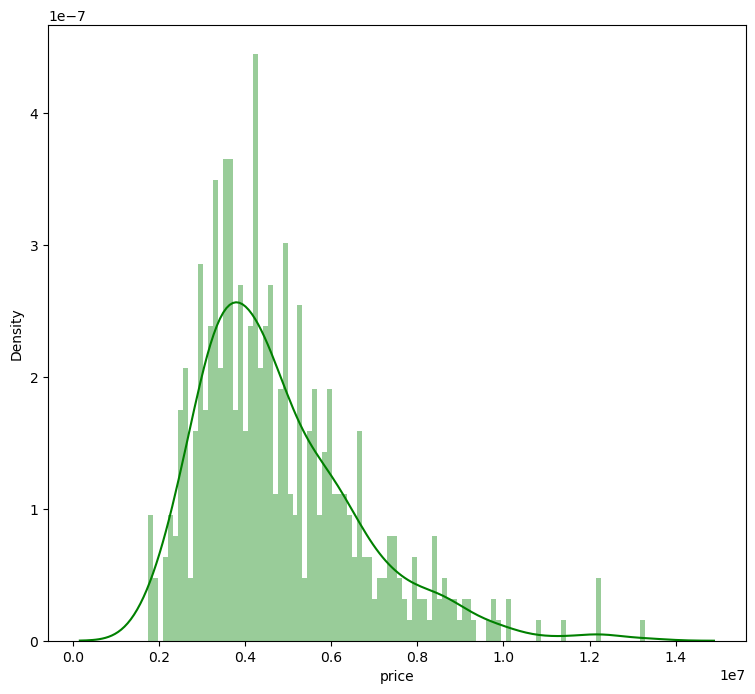

In [70]:
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [74]:
spread = data_subset.std()
tails = data_subset.apply(lambda x: 
len(x[(x < x.quantile(0.05)) | 
(x >  x.quantile(0.95))]))

print("Mean:\n", mean_values)
print("Mode:\n", mode_values)
print("Spread (Std Dev):\n", spread)
print("Tails:\n", tails)

Mean:
 price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
dtype: float64
Mode:
 price        3500000.0
area            6000.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
Name: 0, dtype: float64
Spread (Std Dev):
 price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
dtype: float64
Tails:
 price        51
area         53
bedrooms     14
bathrooms    11
stories       0
dtype: int64


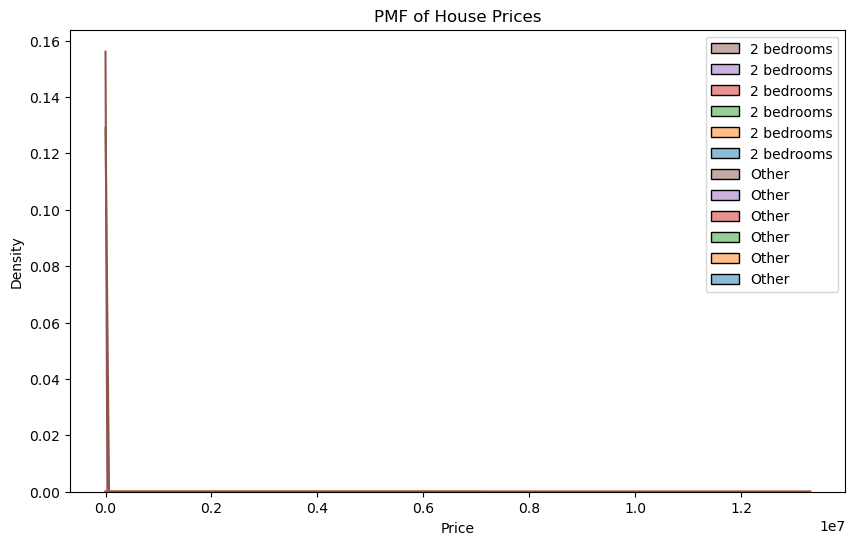

In [78]:
#Price of houses with 2 bedrooms vs other houses
price_2_bedrooms = data[data['bedrooms'] == 2]
['price']
price_other = data[data['bedrooms'] != 2]
['price']

plt.figure(figsize=(10, 6))
sns.histplot(price_2_bedrooms,
bins=30, color= 'blue', label='2 bedrooms', kde=True,
stat='density')
sns.histplot(price_other, bins=30, color='orange', label='Other', kde=True, stat='density')
plt.title('PMF of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

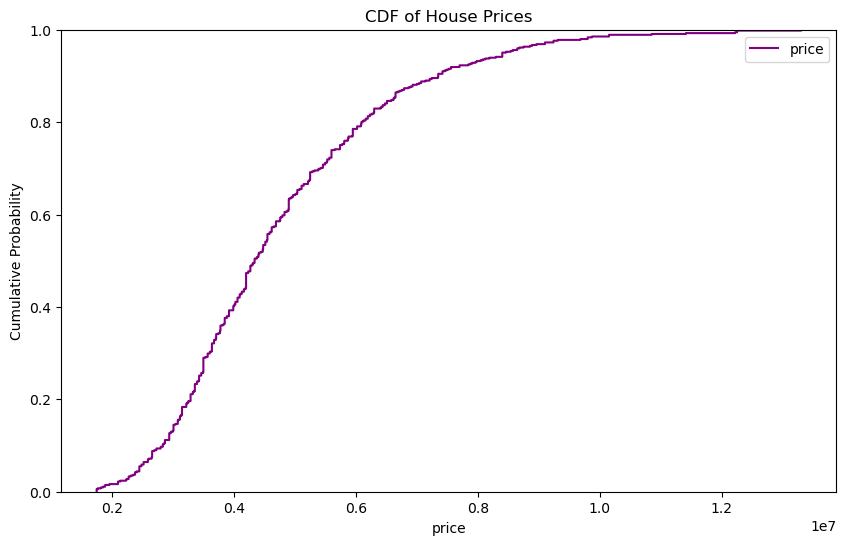

In [80]:
#Cumulative Distribution Function(CDF) for Price
plt.figure(figsize=(10, 6))
sns.ecdfplot(data['price'],
label='price', color='purple')
plt.title('CDF of House Prices')
plt.xlabel('price')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

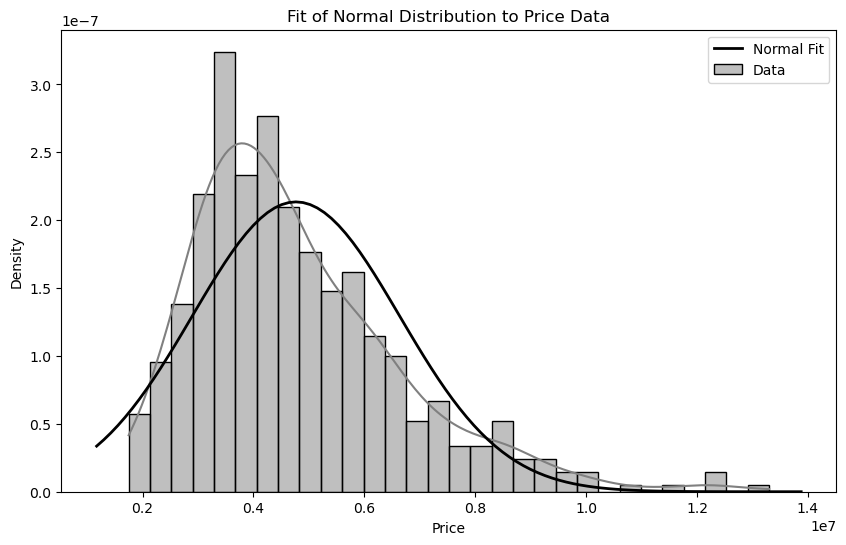

In [84]:
# Fit a normal distribution to the data
from scipy.stats import norm
mu, std = norm.fit(data['price'])

plt.figure(figsize=(10, 6))
sns.histplot(data['price'],
bins=30, kde=True, stat='density', color='gray', label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')
plt.title('Fit of Normal Distribution to Price Data')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [114]:
# Data Distribution
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()



,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [116]:
#Correlation
data_num_corr = data_num.corr()['price'][:-1] # -1 because the latest row is Price
golden_features_list = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with price:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with price:
price        1.000000
area         0.535997
bathrooms    0.517545
Name: price, dtype: float64


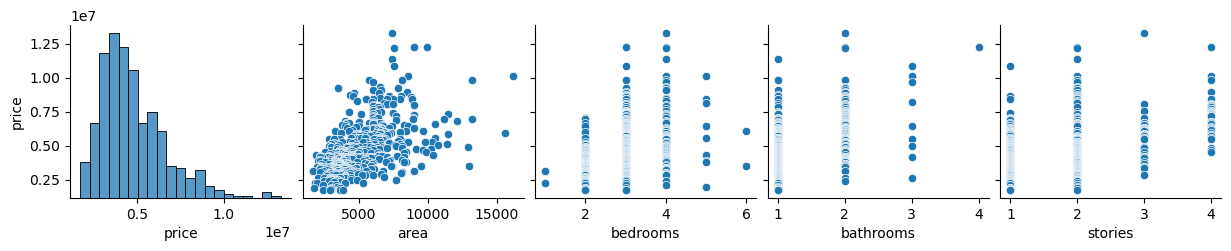

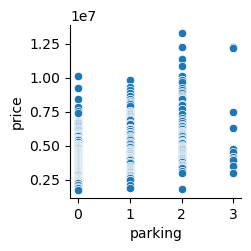

In [120]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['price'])

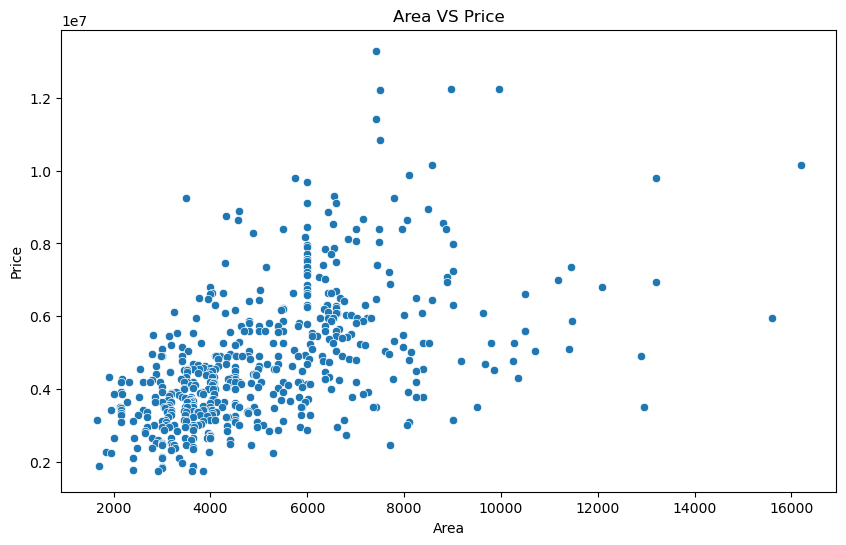

In [92]:
#Scatter plot for Area VS Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['area'], y=data['price'])
plt.title('Area VS Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

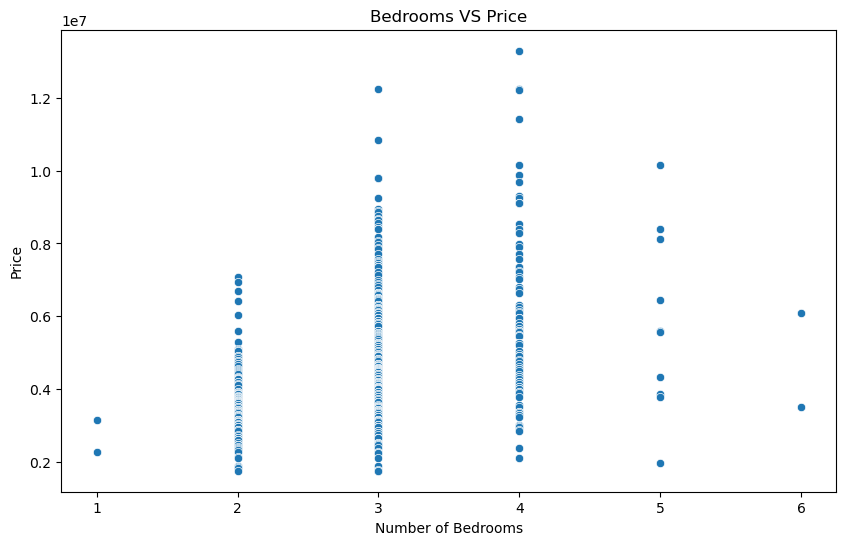

In [94]:
#Scatter plot for Bedrooms VS Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['bedrooms'], y=data['price'])
plt.title('Bedrooms VS Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [96]:
from scipy import stats
# Hypothesis: The price for houses with 3 bedrooms is higher than those with 2 bedrooms
group_2 = data[data['bedrooms'] == 2]['price']
group_3 = data[data['bedrooms'] == 3]['price']

t_stat, p_value = stats.ttest_ind(group_2, group_3, alternative='greater')
print(f'T-statistic: {t_stat}, p_value: {p_value}')

T-statistic: -8.228586962939207, p_value: 0.9999999999999989


In [106]:
import statsmodels.api as sm
#Defining dependent and independent variables
x = data[['area', 'bedrooms','bathrooms']]
y = data['price']

In [108]:
#Adding constant to the independent variables
x = sm.add_constant(x)

In [110]:
#Fit regression model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           4.80e-78
Time:                        21:37:20   Log-Likelihood:                -8461.6
No. Observations:                 545   AIC:                         1.693e+04
Df Residuals:                     541   BIC:                         1.695e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.732e+05   2.65e+05     -0.655      0.5